In [1]:
import pandas as pd

In [2]:
import ast


df = pd.read_csv("gpt_confidence_benchmark_scienceMCQ.csv")
df
# list_from_string = ast.literal_eval(df['log_probs'][0])

# list_from_string

,generated,log_probs,linear_probs,correct_answer
0,"['D', ')', ' MON', 'D', ' is', ' a', ' theory'...","[-0.019647488, -5.5122365e-07, -1.640531e-05, ...","[98.05442660106888, 99.9999448776502, 99.99835...",D
1,"['The', ' best', ' option', ' is', ':', ' A', ...","[-2.5251834, -0.5912242, -4.334534e-05, -1.936...","[8.004363143847625, 55.36490924787134, 99.9956...",A
2,"['A', ')', ' Regular', 'izing', ' the', ' mass...","[-0.0020007233, -2.6968896e-06, -3.750436e-05,...","[99.80012768127486, 99.99973031140365, 99.9962...",C
3,"['A', ')', ' The', ' angular', ' spacing', ' o...","[-1.2230328, -3.4121115e-06, -0.00014036978, -...","[29.433614924742706, 99.99965878943212, 99.985...",D
4,"['A', ')', ' The', ' dimension', ' of', ' an',...","[-0.015195357, -2.1008714e-06, -2.057744e-05, ...","[98.49195098867357, 99.99978991308069, 99.9979...",A
...,...,...,...,...
995,"['D', ')', ' ', '400', 'm', '\n', 'Conf', 'ide...","[-0.00042304752, -3.1281633e-07, -1.0280384e-0...","[99.95770419519847, 99.99996871837189, 99.9998...",D
996,"['A', ')', ' The', ' Ul', 'ma', ' river', ' is...","[-0.5517091, -1.3856493e-06, -0.00018661347, -...","[57.59645876214956, 99.99986143516601, 99.9813...",D
997,"['E', ')', ' The', ' natural', ' habitats', ' ...","[-0.0040742476, -1.3856493e-06, -2.6060809e-05...","[99.59340408864836, 99.99986143516601, 99.9973...",E
998,"['D', ')', ' Produ', 'cing', ' dairy', ' produ...","[-0.009356279, -1.9361265e-07, -3.4121115e-06,...","[99.0687354789025, 99.99998063873687, 99.99965...",A


In [3]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []
linear_prob_list = []
llm_confidence_list = []


def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

import re

def extract_confidence(gen_list):
    generated_text = "".join(gen_list)
    
    # Regular expression to find the last integer or decimal number, optionally in parentheses
    match = re.search(r'(\d+(\.\d+)?)\)?\s*$', generated_text)
    
    if match:
        confidence_value = match.group(1)
        return confidence_value
    else:
        return None

# Test case
# print(extract_confidence(['D', ')', ' ', '451', ' degrees', '\n', 'Conf', 'idence', ':', ' ', '0', '.', '9']))

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]
    linear_prob = ast.literal_eval(df['linear_probs'][i])

    llm_confidence = extract_confidence(generation)
    predicted_answer = find_letter_in_list(generation)[0]


    if predicted_answer is None or llm_confidence is None:
        # print(generation)
        continue 

    llm_confidence_list.append(float(llm_confidence))

    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])
    linear_prob_list.append(linear_prob[find_letter_in_list(generation)[1]])
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list,
    'linear_prob': linear_prob_list,
    'confidence': llm_confidence_list
})

new_df

new_df[new_df['confidence'] > 0.7]
import numpy as np
new_df['llm Confidence'] = np.where(new_df['confidence'] > 0.7, 1, 0)

Frequency of Confident Correct Answers: 543
Frequency of Not Confident Correct Answers: 1
Frequency of Confident Incorrect Answers: 292
Frequency of Not Confident Incorrect Answers: 5


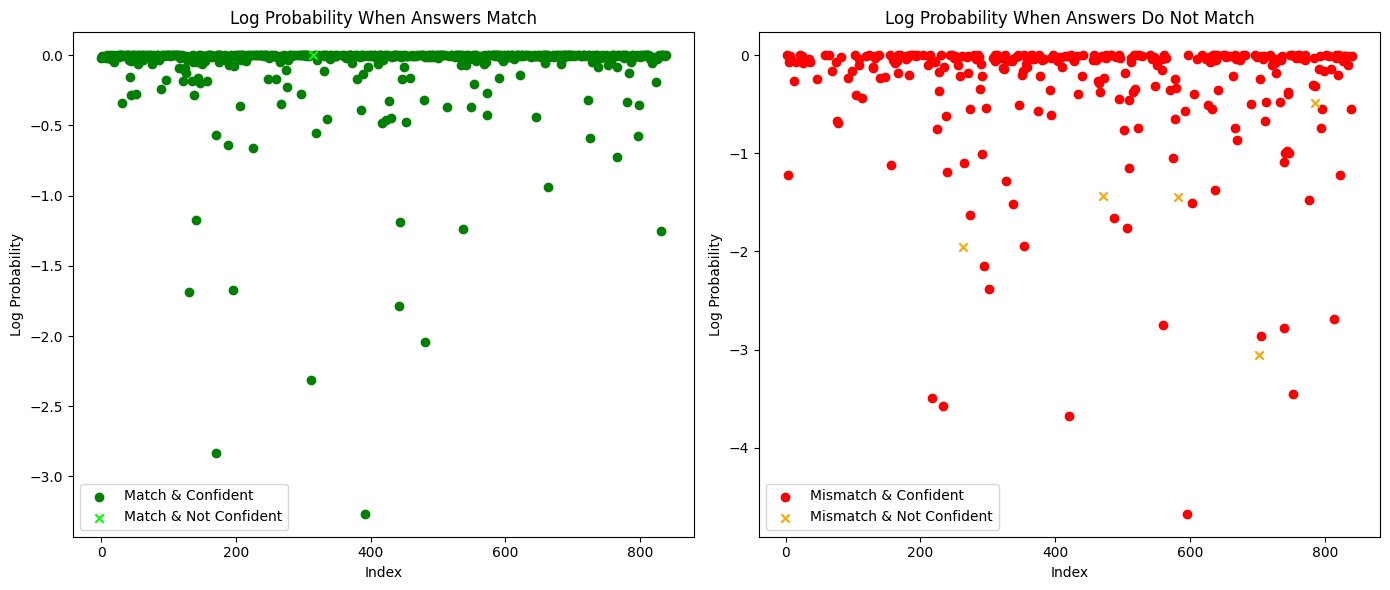

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created with 'correct_answer', 'predicted_answer', 'logprob', and 'llm Confidence' columns

# Filter categories
match_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
match_not_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]
mismatch_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
mismatch_not_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]

# Calculate frequencies
freq_match_confident = len(match_confident)
freq_match_not_confident = len(match_not_confident)
freq_mismatch_confident = len(mismatch_confident)
freq_mismatch_not_confident = len(mismatch_not_confident)

# Print frequencies
print("Frequency of Confident Correct Answers:", freq_match_confident)
print("Frequency of Not Confident Correct Answers:", freq_match_not_confident)
print("Frequency of Confident Incorrect Answers:", freq_mismatch_confident)
print("Frequency of Not Confident Incorrect Answers:", freq_mismatch_not_confident)

# Create scatter plot
plt.figure(figsize=(14, 6))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_confident.index, match_confident['logprob'], color='green', marker='o', label='Match & Confident')
plt.scatter(match_not_confident.index, match_not_confident['logprob'], color='lime', marker='x', label='Match & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_confident.index, mismatch_confident['logprob'], color='red', marker='o', label='Mismatch & Confident')
plt.scatter(mismatch_not_confident.index, mismatch_not_confident['logprob'], color='orange', marker='x', label='Mismatch & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Observations

As seen in the results above, LLMs, specifically GPT3.5, are not a reliable source to assess the confidence in its own answer. 

The LLM only categorized five answers as not confident, and claimed high confidence in over 98% of the incorrect answers.

This points us to leverage alternative directions to such as Logprobs to assess a confidence of a model, and flag potentially incorrect responses